In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
song_data = pd.read_csv("../Data/Most_Streamed_Spotify_Songs_2024.csv", encoding = 'unicode_escape')
song_data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
#Split dates in Release Date Column 
#Split Month to Month Column 
#Split Year Column 

#Converting Release Date Column to DateTime Format 
song_data['Release Date']=pd.to_datetime(song_data['Release Date'])
song_data.dtypes

#Extracting Month and Year
song_data['Month']= song_data['Release Date'].dt.month
song_data['Year']= song_data['Release Date'].dt.year
song_data.head(3)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024


In [4]:
#Create bins for seasons and update Df with Season Name 

bins= [0,3,6,9,12]
season_names = ["Winter","Spring","Summmer","Fall"]
song_data["Seasons"]= pd.cut(song_data["Month"],bins,labels=season_names, include_lowest=True)
song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,105.0,"4,493,884","7,006","207,179","457,017",NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,NaN,NaN,NaN,"193,590",NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0,11,2016,Fall


In [5]:
song_data.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [6]:
#Convert columns to string, replace commas 
columns_to_convert = ['Spotify Streams', 'All Time Rank', 'Spotify Playlist Count','YouTube Views', 'Spotify Playlist Reach','Deezer Playlist Reach',
                      'Amazon Playlist Count', 'TikTok Views','Pandora Track Stations', 'Pandora Streams','Soundcloud Streams','Shazam Counts']
for column in columns_to_convert:
    song_data[column] = song_data[column].astype(str).str.replace(',', '').astype(float)

# Set pandas display options to expand numbers instead of using scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.00,725.40,390470936.00,30716.00,196631588.00,...,114.00,18004655.00,22931.00,4818457.00,2669262.00,NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.00,545.90,323703884.00,28113.00,174597137.00,...,111.00,7780028.00,28444.00,6623075.00,1118279.00,NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.00,538.40,601309283.00,54331.00,211607669.00,...,172.00,5022621.00,5639.00,7208651.00,5285340.00,NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.00,444.90,2031280633.00,269802.00,136569078.00,...,210.00,190260277.00,203384.00,NaN,11822942.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5.00,423.30,107034922.00,7223.00,151469874.00,...,105.00,4493884.00,7006.00,207179.00,457017.00,NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585.00,19.40,305049963.00,65770.00,5103054.00,...,NaN,20104066.00,13184.00,50633006.00,656337.00,NaN,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575.00,19.40,52282360.00,4602.00,1449767.00,...,NaN,NaN,NaN,NaN,193590.00,NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571.00,19.40,189972685.00,72066.00,6704802.00,...,6.00,84426740.00,28999.00,NaN,1135998.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591.00,19.40,145467020.00,14037.00,7387064.00,...,7.00,6817840.00,NaN,NaN,448292.00,NaN,0,11,2016,Fall


In [7]:
#Reducing DataFrame to the columns needed 

reduced_songdata = song_data[
    ["Track", "Album Name","Artist","Release Date","All Time Rank",
     "Spotify Streams","Spotify Popularity","YouTube Views","YouTube Likes",
     "TikTok Posts","TikTok Views","TikTok Likes","TikTok Views","AirPlay Spins","Pandora Streams",
     "Soundcloud Streams", "Explicit Track","Month","Year","Seasons"]]

reduced_songdata

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Views,TikTok Likes,TikTok Views,AirPlay Spins,Pandora Streams,Soundcloud Streams,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1.00,390470936.00,92.00,84274754.00,"1,713,126","5,767,700",5332281936.00,"651,565,900",5332281936.00,"40,975",18004655.00,4818457.00,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2.00,323703884.00,92.00,116347040.00,"3,486,739","674,700",208339025.00,"35,223,547",208339025.00,"40,778",7780028.00,6623075.00,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3.00,601309283.00,92.00,122599116.00,"2,228,730","3,025,400",3369120610.00,"275,154,237",3369120610.00,"74,333",5022621.00,7208651.00,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4.00,2031280633.00,85.00,1096100899.00,"10,629,796","7,189,811",14603725994.00,"1,078,757,968",14603725994.00,"1,474,799",190260277.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,5.00,107034922.00,88.00,77373957.00,"3,670,188","16,400",NaN,NaN,NaN,"12,185",4493884.00,207179.00,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,4585.00,305049963.00,71.00,149247747.00,"1,397,590","48,370",143934379.00,"20,202,000",143934379.00,6,20104066.00,50633006.00,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,4575.00,52282360.00,56.00,943920245.00,"5,347,766",NaN,19935.00,"1,721",19935.00,412,NaN,NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,4571.00,189972685.00,65.00,201027333.00,"1,081,402","7,596",36849005.00,"5,288,677",36849005.00,204,84426740.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,4591.00,145467020.00,66.00,1118595159.00,"3,868,828","11,433",37757301.00,"2,534,831",37757301.00,"1,200",6817840.00,NaN,0,11,2016,Fall


In [8]:
# Calculate averages by month, season, and year

monthly_stats = reduced_songdata.groupby('Month')['Spotify Streams'].mean()
seasonal_stats = reduced_songdata.groupby('Seasons')['Spotify Streams'].mean()
yearly_stats = reduced_songdata.groupby('Year')['Spotify Streams'].mean()

average_spotify_stats = pd.DataFrame({
    "Monthly Average":monthly_stats ,
    "Seasonal Average": seasonal_stats , 
    "Yearly Average": yearly_stats
})

monthly_stats

/var/folders/14/kd5dvlbj2t7dp4cyd4zx18hh0000gn/T/ipykernel_46167/1936505306.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = reduced_songdata.groupby('Seasons')['Spotify Streams'].mean()


Month
1    737811705.79
2    372504221.28
3    392815676.32
4    353344447.75
5    354440741.39
6    395811356.17
7    483547155.49
8    460266424.55
9    422175366.98
10   443678177.58
11   510180646.87
12   385848427.02
Name: Spotify Streams, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4600,) and arg 1 with shape (12,).

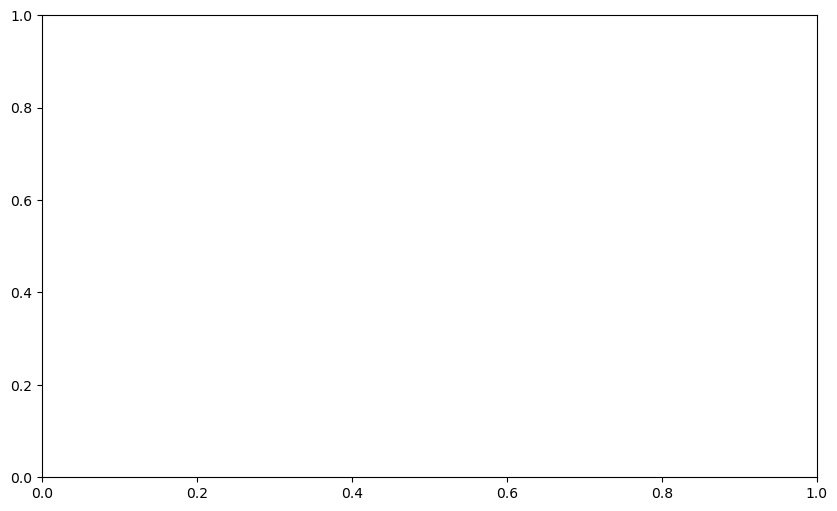

In [17]:
# Monthly Average Spotify Streams

plt.figure(figsize=(10, 6))
x_axis = reduced_songdata["Month"]
plt.bar(x_axis, monthly_stats, color="b")
plt.title('Average Spotify Streams by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.grid(True)
plt.show()

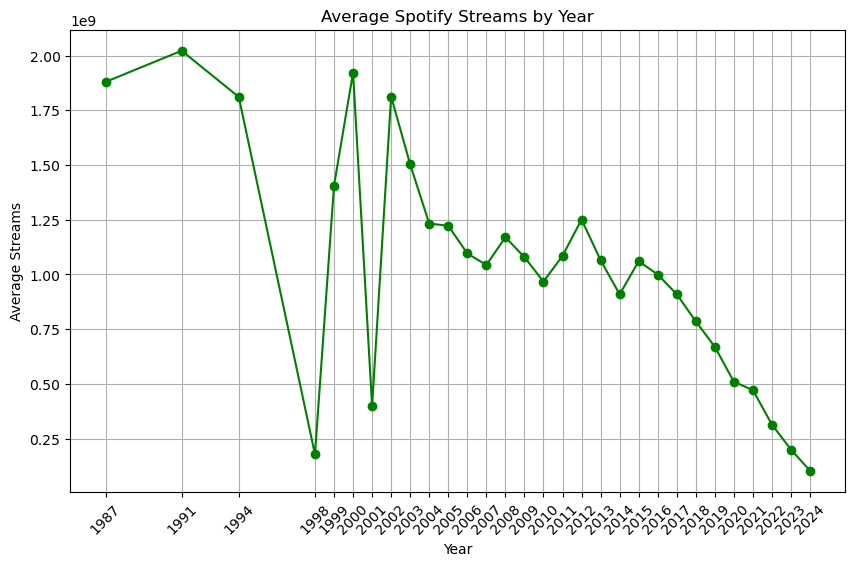

In [26]:
# Yearly Average Spotify Streams
yearly_avg = song_data.groupby('Year')['Spotify Streams'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Average Spotify Streams by Year')
plt.xlabel('Year')
plt.ylabel('Average Streams')
plt.grid(True)
plt.xticks(yearly_avg.index, rotation=45) 
plt.show()

/var/folders/14/kd5dvlbj2t7dp4cyd4zx18hh0000gn/T/ipykernel_44199/1673657968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()


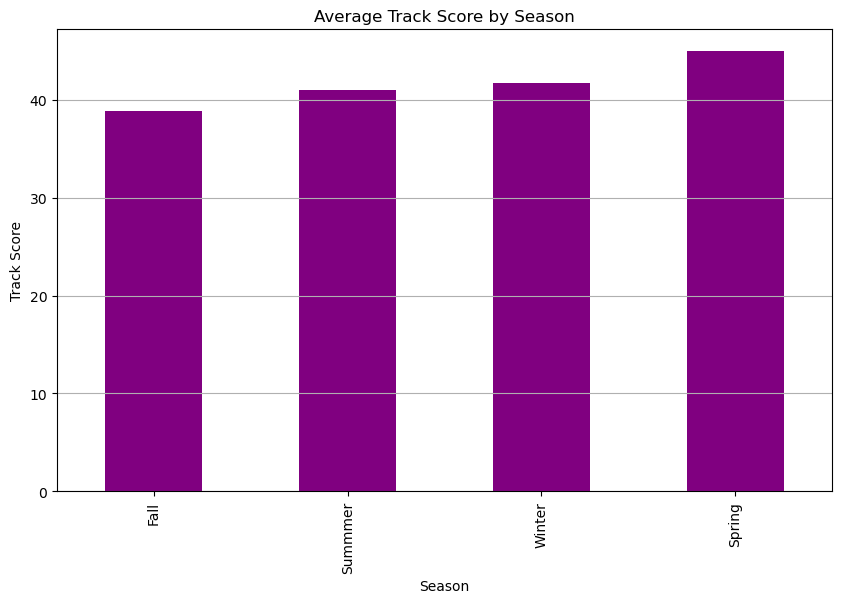

In [28]:
# Bar Graph for Seasonal Differences in Track Scores

seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', color='purple')
plt.title('Average Track Score by Season')
plt.xlabel('Season')
plt.ylabel('Track Score')
plt.grid(True, axis='y')
plt.show()

In [4]:
print(song_data.columns.values)

['Track' 'Album Name' 'Artist' 'Release Date' 'ISRC' 'All Time Rank'
 'Track Score' 'Spotify Streams' 'Spotify Playlist Count'
 'Spotify Playlist Reach' 'Spotify Popularity' 'YouTube Views'
 'YouTube Likes' 'TikTok Posts' 'TikTok Likes' 'TikTok Views'
 'YouTube Playlist Reach' 'Apple Music Playlist Count' 'AirPlay Spins'
 'SiriusXM Spins' 'Deezer Playlist Count' 'Deezer Playlist Reach'
 'Amazon Playlist Count' 'Pandora Streams' 'Pandora Track Stations'
 'Soundcloud Streams' 'Shazam Counts' 'TIDAL Popularity' 'Explicit Track']


Which tracks achieved the most success across all platforms, and what factors contribute to their cross-platform success?

In [25]:
reduced_songdata.dtypes

Track                         object
Album Name                    object
Artist                        object
Release Date          datetime64[ns]
All Time Rank                float64
Spotify Streams              float64
Spotify Popularity           float64
YouTube Views                 object
YouTube Likes                 object
TikTok Posts                  object
TikTok Views                  object
TikTok Likes                  object
TikTok Views                  object
AirPlay Spins                 object
Pandora Streams              float64
Soundcloud Streams           float64
Explicit Track                 int64
Month                          int32
Year                           int32
Seasons                     category
dtype: object

In [10]:
duplicate_columns = reduced_songdata.columns[reduced_songdata.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index(['TikTok Views'], dtype='object')


In [12]:
reduced_songdata = reduced_songdata.loc[:, ~reduced_songdata.columns.duplicated()] 

In [13]:
# Calculate Composite Score
#Summing the values across these columns
reduced_songdata['Composite Score'] = (
    reduced_songdata['Spotify Streams'] +
    reduced_songdata['YouTube Views'] +
    reduced_songdata['TikTok Views'] +
    reduced_songdata['Soundcloud Streams']
)

In [17]:
top_tracks = reduced_songdata.nlargest(10, 'Composite Score')

In [16]:
# Create a Table for Composite Scores
# Select relevant columns for display
composite_score_table = reduced_songdata[['Track', 'Artist', 'Composite Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views']]

# Sort by composite score to display top tracks
composite_score_table = composite_score_table.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)

In [15]:
# Display the top tracks based on their composite score
print("Table of Composite Scores for Top Tracks:")
print(composite_score_table.head(10))

Table of Composite Scores for Top Tracks:
                             Track           Artist  Composite Score  \
0        STAY (with Justin Bieber)    The Kid LAROI   28112792545.00   
1                          Sunroof      Nicky Youre   23047587289.00   
2   Get You The Moon (feat. Snï¿½ï             Kina   22871027638.00   
3                        Calm Down             Rema   19957656987.00   
4  All I Want for Christmas Is You     Mariah Carey   18599552180.00   
5                     Shape of You       Ed Sheeran   14322461659.00   
6                         Believer  Imagine Dragons   13380689084.00   
7                 A Thousand Years  Christina Perri   13238657834.00   
8                             Home   Edith Whiskers   13112111602.00   
9                     Dance Monkey      Tones And I   12337031733.00   

   Spotify Streams  YouTube Views   TikTok Views  
0    3107100349.00  1256973582.00 23712377029.00  
1     879708559.00    74610328.00 22086963233.00  
2    1020435

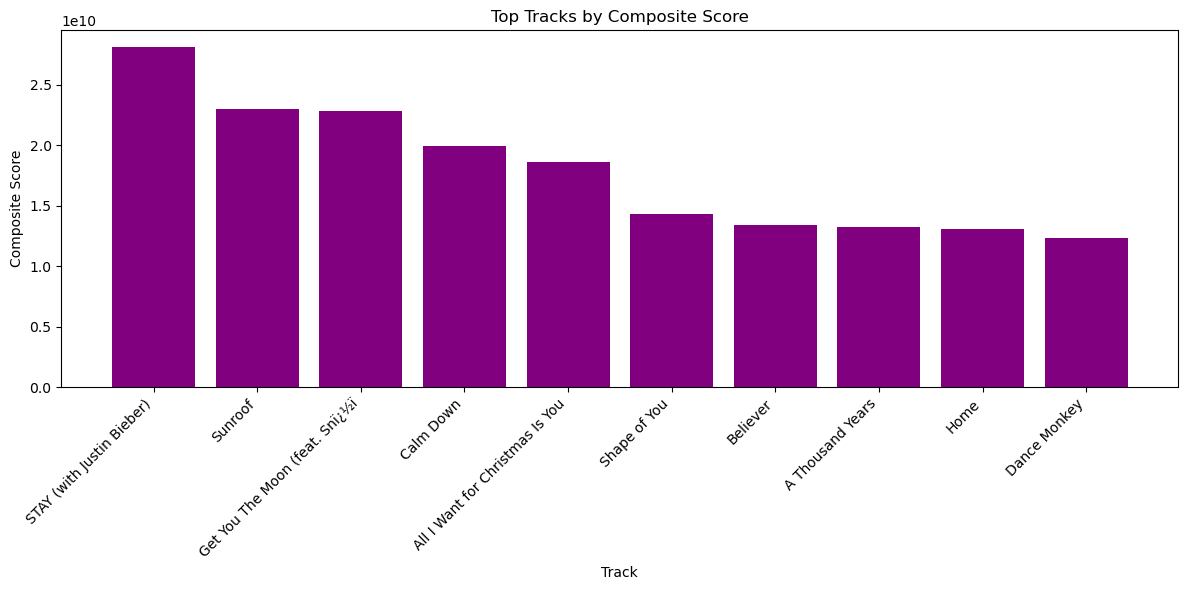

In [19]:
#Visualization 
#Bar Chart for the top tracks by composite score 

plt.figure(figsize=(12,6))
plt.bar(top_tracks["Track"], top_tracks["Composite Score"], color="purple")
plt.title('Top Tracks by Composite Score')
plt.xlabel('Track')
plt.ylabel('Composite Score')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


Average Performance Metrics for Explicit Tracks:
Spotify Streams   442922163.68
YouTube Views     247197584.02
TikTok Views      840983545.32
dtype: float64

Average Performance Metrics for Non-Explicit Tracks:
Spotify Streams   432744112.93
YouTube Views     447840064.28
TikTok Views      954142491.72
dtype: float64


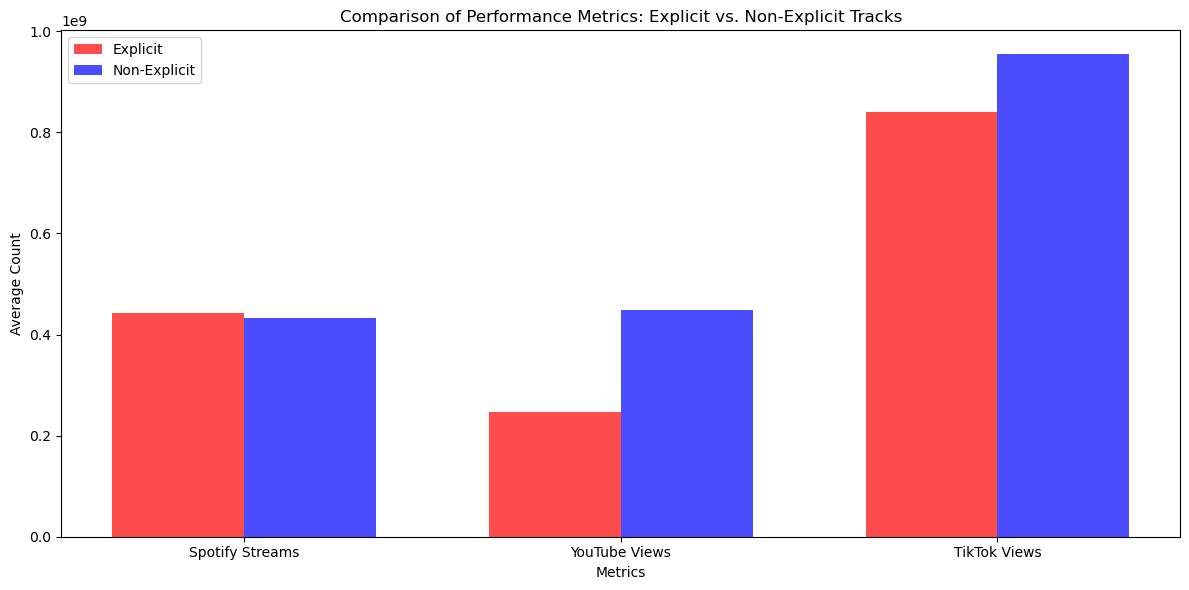

In [21]:

# Convert relevant columns to numeric
def convert_to_numeric(column):
    # Ensure column is a string before applying string operations
    if column.dtype == 'object':
        # Strip commas, convert to numeric, and fill non-numeric values with 0
        return pd.to_numeric(column.str.replace(',', ''), errors='coerce').fillna(0)
    else:
        return column.fillna(0)

# Convert relevant columns to numeric
reduced_songdata['Spotify Streams'] = convert_to_numeric(reduced_songdata['Spotify Streams'])
reduced_songdata['YouTube Views'] = convert_to_numeric(reduced_songdata['YouTube Views'])
reduced_songdata['TikTok Views'] = convert_to_numeric(reduced_songdata['TikTok Views'])

# Step 2: Segment Data into Explicit and Non-Explicit
explicit_tracks = reduced_songdata[reduced_songdata['Explicit Track'] == 1]
non_explicit_tracks = reduced_songdata[reduced_songdata['Explicit Track'] == 0]

# Step 3: Calculate Metrics
# Calculate average performance metrics for each category
explicit_avg = explicit_tracks[['Spotify Streams', 'YouTube Views', 'TikTok Views']].mean()
non_explicit_avg = non_explicit_tracks[['Spotify Streams', 'YouTube Views', 'TikTok Views']].mean()

# Display averages
print("Average Performance Metrics for Explicit Tracks:")
print(explicit_avg)
print("\nAverage Performance Metrics for Non-Explicit Tracks:")
print(non_explicit_avg)

# Step 4: Visualization
# Bar chart to compare performance metrics
categories = ['Spotify Streams', 'YouTube Views', 'TikTok Views']

plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
x = range(len(categories))

# Plot bars for explicit and non-explicit averages
plt.bar(x, explicit_avg, width=bar_width, label='Explicit', color='red', alpha=0.7)
plt.bar([p + bar_width for p in x], non_explicit_avg, width=bar_width, label='Non-Explicit', color='blue', alpha=0.7)

plt.title('Comparison of Performance Metrics: Explicit vs. Non-Explicit Tracks')
plt.ylabel('Average Count')
plt.xlabel('Metrics')
plt.xticks([p + bar_width/2 for p in x], categories)  # Center the labels
plt.legend()
plt.tight_layout()
plt.show()


